In [501]:
import pandas as pd
import matplotlib.pyplot as plt

In [502]:
datos=pd.read_csv("https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt",sep = "\t")

In [503]:
datos =pd.DataFrame(datos)
datos.head(10)

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0
5,1930,Uruguay,Estadio Parque Central,Montevideo,(6),1930-07-16,Chile,Mexico,3,0
6,1930,Uruguay,Estadio Parque Central,Montevideo,(7),1930-07-17,Yugoslavia,Bolivia,4,0
7,1930,Uruguay,Estadio Parque Central,Montevideo,(8),1930-07-17,Estados Unidos,Paraguay,3,0
8,1930,Uruguay,Estadio Centenario,Montevideo,(9),1930-07-18,Uruguay,Perú,1,0
9,1930,Uruguay,Estadio Centenario,Montevideo,(10),1930-07-19,Chile,Francia,1,0


In [504]:
partidos_alemania = datos[datos['equipo_1'] == 'Alemania']
partidos_brasil = datos[datos['equipo_1'] == 'Brasil']

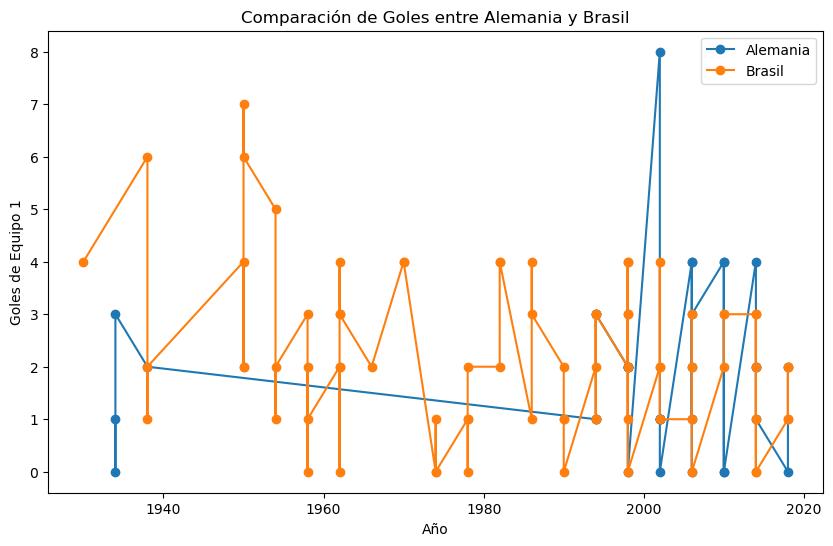

<Figure size 640x480 with 0 Axes>

In [505]:
plt.figure(figsize=(10, 6))
plt.plot(partidos_alemania ['anio'], partidos_alemania['equipo_1_final'], label='Alemania', marker='o')
plt.plot(partidos_brasil['anio'], partidos_brasil['equipo_1_final'], label='Brasil', marker='o')
plt.xlabel('Año')
plt.ylabel('Goles de Equipo 1')
plt.title('Comparación de Goles entre Alemania y Brasil')
plt.legend()
plt.show()
plt.savefig('ComparaciónAlemaniBrasil.png') #Se guarda la figura 1

In [506]:
data=datos[['anio','equipo_1','equipo_1_final']]
data

,anio,equipo_1,equipo_1_final
0,1930,Francia,4
1,1930,Estados Unidos,3
2,1930,Yugoslavia,2
3,1930,Rumania,3
4,1930,Argentina,1
...,...,...,...
895,2018,Suecia,0
896,2018,Francia,1
897,2018,Croacia,2
898,2018,Bélgica,2


In [507]:
dataAlemania1=data[data['equipo_1']=='Alemania']
dataAlemania1=pd.DataFrame(dataAlemania1.groupby(['anio'])['equipo_1_final'].sum())

Alemania=dataAlemania1.rename(columns={'equipo_1_final': 'Alemania'})


In [508]:
dataBrasil1=data[data['equipo_1']=='Brasil']
Brasil =pd.DataFrame(dataBrasil1.groupby('anio')['equipo_1_final'].sum())
Brasil=Brasil.rename(columns={'equipo_1_final': 'Brasil'})


In [509]:
data =Alemania.reset_index()
data2=Brasil.reset_index()

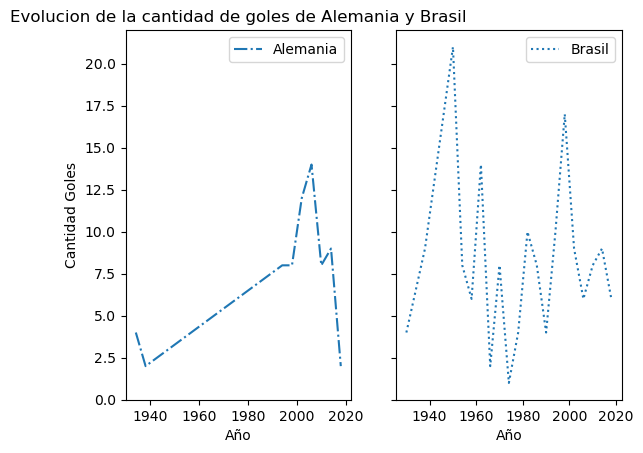

In [510]:
fig=plt.figure()
eje=fig.add_subplot(1,2,1)
plt.title('Evolucion de la cantidad de goles de Alemania y Brasil',ha='center')
data.plot(x='anio',y='Alemania',ax=eje,ls='-.')
eje2=fig.add_subplot(1,2,2,sharey=eje)
data2.plot(x='anio',y='Brasil',ax=eje2,ls='dotted')

eje.set_xlabel('Año')
eje2.set_xlabel('Año')
eje.set_ylabel('Cantidad Goles')

plt.savefig('GolesAlemaniBrasil.png') #Se guarda la figura 2